### Analysis using SARIMAX model for Time Series

In [53]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf


#### Importing already collected data

In [10]:
df = pd.read_csv("./datasets/proc/variables.csv.zip", index_col = 0)

In [11]:
df

,date,ICON,IEEX,IFNC,IMAT,IMOB,INDX,UTIL,DOLLAR,GDP,IPCA,SELIC,VIX
0,2007-12-28,1077.90,17305.63,2742.89,2266.68,1000.00,9957.43,1616.45,1.767300,7.263393e+05,0.54,0.042065,20.740000
1,2008-01-02,1062.92,17005.44,2633.96,2215.22,975.37,9778.31,1608.15,1.764500,7.120552e+05,1.03,0.042065,23.170000
2,2008-01-04,1048.14,16893.17,2583.73,2171.25,952.34,9647.16,1597.60,1.757200,7.120552e+05,1.03,0.042065,23.940001
3,2008-01-07,1044.37,16934.50,2603.15,2125.57,950.63,9529.71,1603.98,1.764000,7.120552e+05,1.03,0.045584,23.790001
4,2008-01-08,1044.14,17054.26,2638.25,2161.35,954.55,9601.26,1615.72,1.752000,7.120552e+05,1.03,0.048230,25.430000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2734,2020-12-22,5238.56,79754.15,12045.86,5342.85,1033.98,22914.66,8438.86,5.118938,2.003500e+06,0.25,0.007469,24.230000
2735,2020-12-23,5261.63,81004.23,12200.66,5350.37,1039.16,22964.38,8595.09,5.156655,2.003500e+06,0.25,0.007469,23.309999
2736,2020-12-28,5322.32,82320.49,12401.83,5364.20,1053.39,23227.52,8736.83,5.215300,2.003500e+06,0.25,0.007469,21.700001
2737,2020-12-29,5357.93,82437.03,12413.77,5418.40,1051.68,23417.76,8719.39,5.245900,2.003500e+06,0.25,0.007469,23.080000


#### Preprocessing for the analysis

In [13]:
# Scaling values
scaler = MinMaxScaler()

df[["ICON", "IEEX", "IFNC", "IMAT", "IMOB", "INDX", "UTIL", "DOLLAR", "GDP", "IPCA",
    "SELIC", "VIX"]] = scaler.fit_transform(df[["ICON", "IEEX", "IFNC", "IMAT", "IMOB", "INDX", "UTIL", "DOLLAR", "GDP", "IPCA",
                                                                            "SELIC", "VIX"]])

In [14]:
df

,date,ICON,IEEX,IFNC,IMAT,IMOB,INDX,UTIL,DOLLAR,GDP,IPCA,SELIC,VIX
0,2007-12-28,0.092785,0.065873,0.117001,0.295787,0.599153,0.290523,0.056326,0.053668,0.011061,0.064635,0.767742,0.157601
1,2008-01-02,0.089863,0.061595,0.108010,0.284359,0.580390,0.281082,0.055296,0.053025,0.000000,0.109880,0.767742,0.190645
2,2008-01-04,0.086980,0.059994,0.103863,0.274594,0.562847,0.274169,0.053987,0.051347,0.000000,0.109880,0.767742,0.201115
3,2008-01-07,0.086244,0.060584,0.105466,0.264449,0.561544,0.267978,0.054778,0.052910,0.000000,0.109880,0.845835,0.199075
4,2008-01-08,0.086200,0.062290,0.108364,0.272395,0.564530,0.271749,0.056235,0.050153,0.000000,0.109880,0.904554,0.221376
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2734,2020-12-22,0.904369,0.955934,0.884923,0.978955,0.625038,0.973482,0.903035,0.823681,1.000000,0.037858,0.000000,0.205058
2735,2020-12-23,0.908869,0.973751,0.897701,0.980625,0.628984,0.976103,0.922424,0.832347,1.000000,0.037858,0.000000,0.192548
2736,2020-12-28,0.920708,0.992511,0.914307,0.983697,0.639824,0.989973,0.940015,0.845820,1.000000,0.037858,0.000000,0.170655
2737,2020-12-29,0.927654,0.994172,0.915292,0.995734,0.638522,1.000000,0.937851,0.852850,1.000000,0.037858,0.000000,0.189421


In [32]:
np.column_stack([df["DOLLAR"],df["GDP"]])

array([[0.05366784, 0.01106052],
       [0.05302456, 0.        ],
       [0.05134744, 0.        ],
       ...,
       [0.84581981, 1.        ],
       [0.85284995, 1.        ],
       [0.84428053, 1.        ]])

/home/kevinfkuhl/.local/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


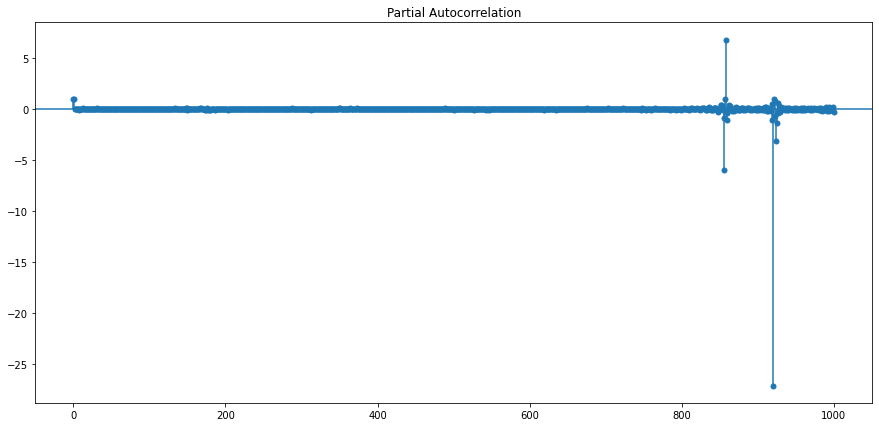

In [55]:
fig, ax = plt.subplots(figsize=(15,7))
plot_pacf(df["UTIL"], lags=1000, ax=ax)
plt.show()

In [57]:
model_ICON = sm.tsa.statespace.SARIMAX(df["ICON"], df[["DOLLAR", "GDP"]], order=(1, 1, 1), seasonal_order=(
    0, 1, 1, 10), trend='t', enforce_inversibility=False, enforce_stationarity=False, simple_differencing=True)

result_ICON = model_ICON.fit()

print(result_ICON.summary())

/home/kevinfkuhl/.local/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                        D.DS10.ICON   No. Observations:                 2728
Model:             SARIMAX(1, 0, 1)x(0, 0, 1, 10)   Log Likelihood                8514.868
Date:                            Fri, 02 Apr 2021   AIC                         -17015.736
Time:                                    16:20:25   BIC                         -16974.388
Sample:                                         0   HQIC                        -17000.788
                                           - 2728                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift        1.32e-08   5.56e-08      0.237      0.812   -9.58e-08    1.22e-07
DOLLAR        -0.0702      0.022   

In [ ]:
[df["DOLLAR"], df["GDP"], df["IPCA"], df["SELIC"], df["VIX"]]